In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import matplotlib.ticker as ticker
from highlight_text import fig_text
%matplotlib inline


In [13]:
df=pd.read_html("https://fbref.com/en/squads/d07537b9/2023-2024/matchlogs/c9/schedule/Brighton-and-Hove-Albion-Scores-and-Fixtures-Premier-League")[0]

In [14]:
df=df[["Date","Round","Venue","Result","GF","GA","Opponent","xG","xGA"]]

In [15]:
df.dropna(inplace=True)

In [16]:
df

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA
0,2023-08-12,Matchweek 1,Home,W,4.0,1.0,Luton Town,4.0,1.5
1,2023-08-19,Matchweek 2,Away,W,4.0,1.0,Wolves,2.2,2.1
2,2023-08-26,Matchweek 3,Home,L,1.0,3.0,West Ham,1.5,3.0
3,2023-09-02,Matchweek 4,Home,W,3.0,1.0,Newcastle Utd,1.3,1.2
4,2023-09-16,Matchweek 5,Away,W,3.0,1.0,Manchester Utd,1.7,1.0
5,2023-09-24,Matchweek 6,Home,W,3.0,1.0,Bournemouth,1.9,1.1
6,2023-09-30,Matchweek 7,Away,L,1.0,6.0,Aston Villa,1.7,1.6
7,2023-10-08,Matchweek 8,Home,D,2.0,2.0,Liverpool,2.3,2.3
8,2023-10-21,Matchweek 9,Away,L,1.0,2.0,Manchester City,0.8,0.8
9,2023-10-29,Matchweek 10,Home,D,1.0,1.0,Fulham,1.4,0.7


In [53]:
df["match.no"]=df["Round"].str.split(" ",n=2,expand=True)[1]

In [54]:
df

,Date,Round,Venue,Result,GF,GA,Opponent,xG,xGA,match.no
0,2023-08-12,Matchweek 1,Home,W,4.0,1.0,Luton Town,4.0,1.5,1
1,2023-08-19,Matchweek 2,Away,W,4.0,1.0,Wolves,2.2,2.1,2
2,2023-08-26,Matchweek 3,Home,L,1.0,3.0,West Ham,1.5,3.0,3
3,2023-09-02,Matchweek 4,Home,W,3.0,1.0,Newcastle Utd,1.3,1.2,4
4,2023-09-16,Matchweek 5,Away,W,3.0,1.0,Manchester Utd,1.7,1.0,5
5,2023-09-24,Matchweek 6,Home,W,3.0,1.0,Bournemouth,1.9,1.1,6
6,2023-09-30,Matchweek 7,Away,L,1.0,6.0,Aston Villa,1.7,1.6,7
7,2023-10-08,Matchweek 8,Home,D,2.0,2.0,Liverpool,2.3,2.3,8
8,2023-10-21,Matchweek 9,Away,L,1.0,2.0,Manchester City,0.8,0.8,9
9,2023-10-29,Matchweek 10,Home,D,1.0,1.0,Fulham,1.4,0.7,10


In [40]:
x=np.arange(1,26,1)
y=df["xG"]
y1=df["xGA"]

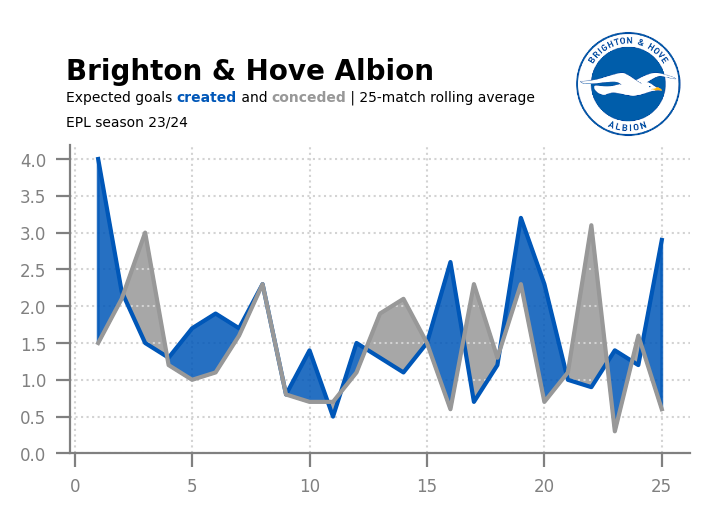

In [110]:
#ploting Xg anad xga 
fig,ax=plt.subplots(figsize=(4,2),dpi=200)
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)
line1=ax.plot(x,y,zorder=4,color= "#0057B8")
line2=ax.plot(x,y1,zorder=4,color="#989898")
# Set x-axis major tick positions to only 5 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)
ax.fill_between(
    x, 
    y,
    y1, 
    where = y > Y1, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,color = line1[0].get_color())
ax.fill_between(
    x, 
    y,
    y1, 
    where = y1 >= y, 
    interpolate = True,
    alpha = 0.85,
    color =line2[0].get_color())

ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)
# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Brighton & Hove Albion",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)
fig_text(
     x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 25-match rolling average\nEPL season 23/24",
     highlight_textprops = [
        {"color": line1[0].get_color(), "weight": "bold"},
        {"color": line2[0].get_color(), "weight": "bold"}],
    color = "black",
    size = 5,
    annotationbbox_kw={"xycoords": "figure fraction"})
image_path1 = 'C:\\Users\\welcome\\Downloads\\my football_work\\logo\\brighton.png' # Replace 'path_to_your_image.png' with the path to your image
image1 = plt.imread(image_path1)
offset_image1 = OffsetImage(image1, zoom=0.2)

ab1 = AnnotationBbox(offset_image1, (0, 1), frameon=False, xycoords='axes fraction', xybox=(.90,1.20))
ax.add_artist(ab1)
